# Notes

Here I will present a couple of notes and important concepts that I deem necessary or important. This is, after all, an attempt to teach myself Dynamical Systems so I would like to have these concepts in a handy place.

## Concepts

1. **Flow:** Where is the system moving towards? Given a system

   $$\dot{x} = f(x) $$
   
   the _flow_ will be moving towards the **right** if $\dot{x} > 0$ and towards the **left** if $\dot{x} < 0.$
   
2. **Fixed points:** Every point where there is **no flow**, i.e. $\dot{x} = 0.$ There can be two types of _fixed points:_
    
    a. **Stable:** _flow_ is **towards them**, and they are also called _attractors_ or _sinks._
    
    b. **Unstable:** _flow_ moves **away from them**, and they are also known as _repellers_ or _sources._

### Exercise 2.1.

In the next three exercises, interpret $$\dot{x} = \sin{x}$$ as a _flow_ on the line.

### 2.1.1. Find all the fixed points of the flow.

To answer this question one must find all values that satisfy
$$\dot{x} = \sin{x} = 0,$$
**analytically** it's quite simple, one must solve
$$\sin{x} = 0$$
which has solutions
$$x = n \pi ,\ n \in \mathbb{Z}.$$

In [2]:
# Numerically, one can find the roots and plot them
# First, import the necessary libraries
using Roots
using Plots
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [30]:
# Define the function
f(x) = sin(x)
# Find all the zeros of this function within the interval
# x ∈ [-10π, 10π]
solutions = fzeros(f, -5π, 5π)

11-element Array{Float64,1}:
 -15.707963267948966
 -12.566370614359172
  -9.42477796076938 
  -6.283185307179586
  -3.141592653589793
   0.0              
   3.141592653589793
   6.283185307179586
   9.42477796076938 
  12.566370614359172
  15.707963267948966

Here we can see that our analytical result is right, every zero from this function is an integer multiple of $\pi,$ which is the desired result.

We can now plot this in order to see a picture of the expected result.

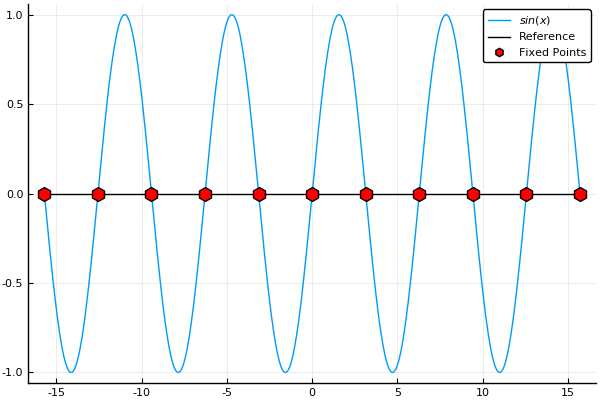

In [31]:
# Now we plot these points
x_vals = range(-5π, 5π, length=500)
plot(x_vals, f.(x_vals), lab = L"sin(x)", leg = :topright)
# This is a black line for reference, just to know where zero is
plot!(x_vals, zeros(length(x_vals)), color = :black, lab = "Reference")
# And these are the fixed points.
scatter!(solutions, zeros(length(solutions)), marker = (:hexagon, 10, :red), lab = "Fixed Points")

Just a quick note about the _fixed points_ we just found. These points are both the **stable** and **unstable** _fixed points_, we are not making a difference between them in this plot.

### 2.1.2. At which points $x$ does the flow have greatest velocity to the right?

Recall that in the book we have the following picture.

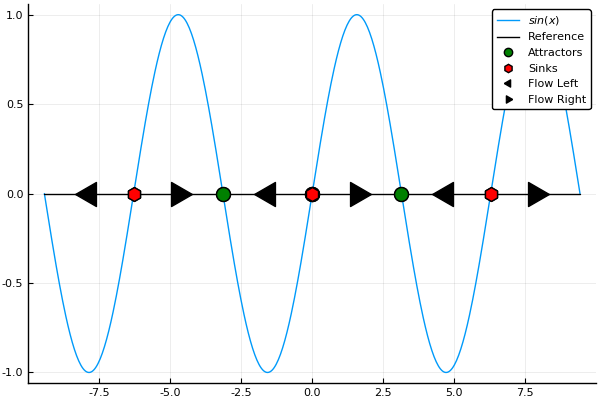

In [80]:
# Create a new set of solutions, a smaller set
solutions = fzeros(f, -3π, 3π)
# Now we plot these points
x_vals = range(-3π, 3π, length=500)
plot(x_vals, f.(x_vals), lab = L"sin(x)", leg = :topright)
# This is a black line for reference, just to know where zero is
plot!(x_vals, zeros(length(x_vals)), color = :black, lab = "Reference")

# Create the "attractors"
attractors = zeros(length(solutions))
for i = 1:length(solutions)
    # We round to nearest to also incluse negative values
   attractors[i] = rem2pi(solutions[i], RoundNearest)
end
scatter!(attractors, zeros(length(solutions)), marker = (:circle, 10, :green), lab = "Attractors")

# And now create the "sinks"
sinks = zeros(length(solutions))
for i = 1:length(solutions)
    # Every other value from the attractors, also rounded to nearest
   sinks[i] = 2*rem2pi(solutions[i], RoundNearest)
end
scatter!(sinks, zeros(length(solutions)), marker = (:hexagon, 10, :red), lab = "Sinks")

# Create arrows to the left
l_arr = range(-5π/2, stop=3π/2, step=2π)
scatter!(l_arr, zeros(length(l_arr)), marker = (:ltriangle, 20, :black), lab = "Flow Left")
# Create arrows to the right
r_arr = range(-3π/2, stop=5π/2, step=2π)
scatter!(r_arr, zeros(length(r_arr)), marker = (:rtriangle, 20, :black), lab = "Flow Right")

Maybe not as pretty as the original, but the idea here is that we must observe the values where the _flow_ has _greatest_ velocity to the **right,** but we have already done this while plotting this graph!

How? Recall that while the _flow_ is leaving a _sink_ it starts to speed up quite quickly until it reaches a certain value. Can you spot it? It corresponds to the values where the **right arrows** are **plotted**, thus the **local maximum** within every period.

This is $$x = \frac{\pi}{2}, \frac{3\pi}{2},\frac{5\pi}{2}, \cdots ,$$
and so on, or in a simplified expression,
$$ x = \frac{n \pi}{2},\quad n \in \mathbb{Z}.$$